In [66]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster

In [6]:
def load_fmri_data(pickle_file):
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
    return data

In [7]:
roi_names = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"]
subjects = [f"sub{str(i).zfill(2)}" for i in range(1, 11)]  # sub_01 to sub_10
folder_path = (r'C:\Users\andre\OneDrive\Documents\GitHub\algonuts_2021_andrea\participants_data_v2021\mini_track')

In [8]:
def calculate_mean_activation(data):
    mean_activations = {'train': np.mean(data['train'], axis=(1, 2))}
    return mean_activations

In [13]:
# Initialize a dictionary to hold mean activations
mean_activations_all = {roi: [] for roi in roi_names}

# Iterate over subjects and ROIs to calculate mean activations
for subject in tqdm(subjects, desc="Processing subjects"):
    subject_path = os.path.join(folder_path, subject)
    for roi_name in roi_names:
        roi_activations = []
        file_path = os.path.join(subject_path, f"{roi_name}.pkl")
        if os.path.exists(file_path):
            data = load_fmri_data(file_path)
            mean_activations = calculate_mean_activation(data)
            roi_activations.append(mean_activations['train'])
        if roi_activations:
            mean_activations_all[roi_name].append(np.mean(roi_activations, axis=0))

# Calculate average activations across subjects for each ROI
average_activations = {roi: np.mean(np.array(activations), axis=0) for roi, activations in mean_activations_all.items()}

# Create a DataFrame for the results
video_ids = range(len(average_activations[next(iter(average_activations))]))
rows = []
for video_id in video_ids:
    row = {'Video_ID': f"Video{video_id +1}"}
    for roi in roi_names:
        row[roi] = average_activations[roi][video_id]
    rows.append(row)

results_df = pd.DataFrame(rows)

Processing subjects: 100%|██████████| 10/10 [00:00<00:00, 39.48it/s]


In [15]:
results_df

,Video_ID,EBA,FFA,LOC,PPA,STS,V1,V2,V3,V4
0,Video1,-0.186611,-0.135036,-0.096835,-0.230458,-0.154473,-0.141215,-0.101409,-0.155718,-0.276208
1,Video2,0.198860,0.082149,0.001808,-0.125427,0.338054,-0.049526,-0.022767,-0.016086,-0.021808
2,Video3,0.077459,0.104080,0.018081,-0.087505,0.062854,-0.073844,-0.051008,-0.070315,-0.108661
3,Video4,-0.014193,0.004084,0.086296,0.238211,-0.017574,0.044522,0.001136,0.001210,0.079227
4,Video5,0.281342,0.136370,0.093665,-0.072349,0.124935,0.180783,0.205436,0.157614,0.071263
...,...,...,...,...,...,...,...,...,...,...
995,Video996,0.183165,0.027025,0.054286,0.043344,0.089364,-0.039117,-0.075318,-0.013235,0.023853
996,Video997,0.116717,0.257834,0.173399,0.049395,0.060654,0.021268,0.104601,0.135114,0.141503
997,Video998,-0.083002,-0.062089,-0.201866,0.021943,0.057620,-0.010215,-0.060791,-0.063151,0.071178
998,Video999,0.130871,0.234017,0.014473,0.051557,0.260247,0.089387,0.083267,0.049478,-0.003945


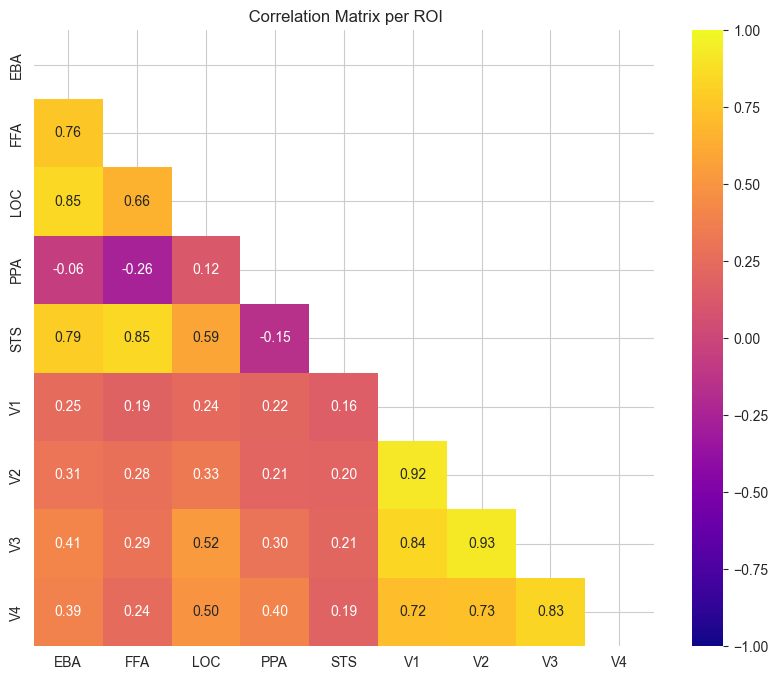

In [41]:
# Assuming roi_names contains the names of your ROIs
correlation_matrix = results_df[roi_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the lower triangle with 'plasma' colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='plasma', annot=True, fmt=".2f", mask=mask, xticklabels=roi_names, yticklabels=roi_names, vmin=-1, vmax=1)
plt.title(' Correlation Matrix per ROI')
plt.show()

PPA represents places by encoding the geometry of the local environment

In [24]:
results_df.describe()

,EBA,FFA,LOC,PPA,STS,V1,V2,V3,V4
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,4.440892e-19,-1.554312e-18,0.000000,-4.440892e-19,1.110223e-18,4.440892e-19,0.000000,0.000000,-2.220446e-19
std,1.846661e-01,1.664681e-01,0.137915,1.253120e-01,1.371590e-01,1.137559e-01,0.113426,0.108990,1.264753e-01
min,-5.005460e-01,-3.949251e-01,-0.402989,-3.294321e-01,-3.111326e-01,-3.287045e-01,-0.320666,-0.332883,-4.060114e-01
25%,-1.200525e-01,-1.220935e-01,-0.091734,-8.739383e-02,-1.001027e-01,-7.713053e-02,-0.074630,-0.073970,-8.404700e-02
50%,7.373194e-03,-5.289378e-03,0.006022,-1.198424e-02,-4.132113e-03,-1.903319e-03,-0.002067,-0.002766,-3.740075e-03
75%,1.359902e-01,1.186570e-01,0.096220,7.721436e-02,8.526112e-02,7.816218e-02,0.077467,0.069107,7.959299e-02
max,4.971931e-01,5.543689e-01,0.339251,4.042757e-01,5.431413e-01,3.681033e-01,0.363525,0.338843,4.122585e-01


In [57]:
# Calculate the pairwise correlation distance
correlation_distance = pdist(results_df.drop('Video_ID', axis=1), metric='correlation')

# Convert the pairwise distances into a square matrix
correlation_distance_matrix = squareform(correlation_distance)

# Perform hierarchical clustering
Z = linkage(correlation_distance, 'average')

similarity_threshold = 0.5  # Define a threshold for similarity

# Define a threshold for similarity, converted to cophenetic distance
cophenetic_threshold = 1 - similarity_threshold

# Cluster videos based on the defined threshold
clusters = fcluster(Z, t=cophenetic_threshold, criterion='distance')

# Create a new DataFrame with Video_ID and the assigned cluster (group name)
video_groups_df = pd.DataFrame({
    'Video_ID': results_df['Video_ID'],
    'Group_Name': clusters
})

# Normalize the group names to start from "group_1" onwards
unique_clusters = sorted(video_groups_df['Group_Name'].unique())
group_name_mapping = {cluster: f"group_{i+1}" for i, cluster in enumerate(unique_clusters)}
video_groups_df['Group_Name'] = video_groups_df['Group_Name'].map(group_name_mapping)

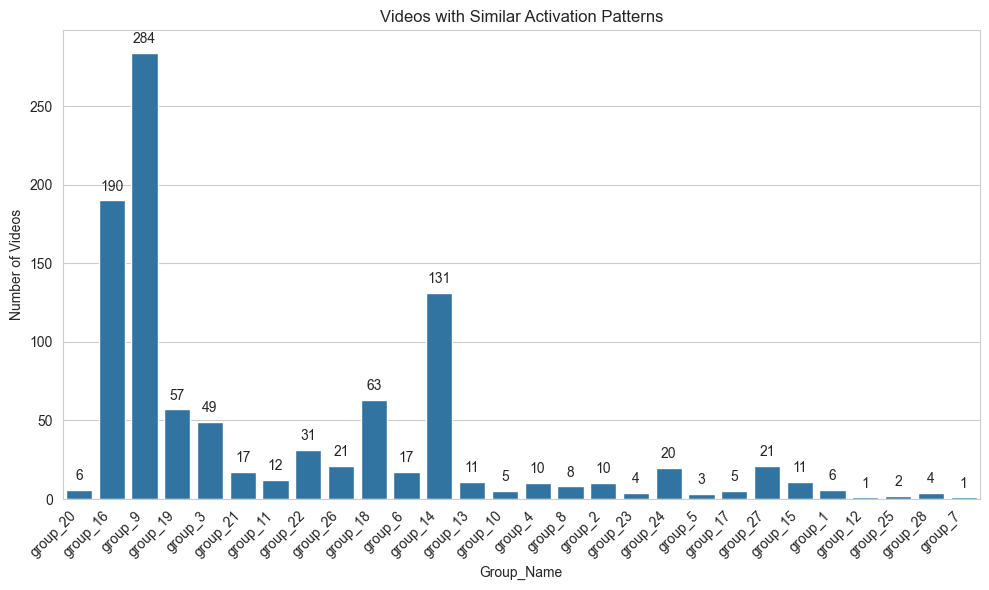

In [68]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=video_groups_df, x='Group_Name')

# Rotate x-axis labels
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the number of videos in each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Add labels and title
plt.ylabel('Number of Videos')
plt.title('Videos with Similar Activation Patterns')

# Show plot
plt.tight_layout()

In [71]:
# Add the group names to the original results DataFrame
full_analysis = pd.merge(results_df, video_groups_df[['Video_ID', 'Group_Name']], on='Video_ID', how='left')

In [31]:
# 2. Define the list of video indices with faces
faces_indices = ['0002', '0003', '0004', '0005', '0006', '0010', '0014', '0018', '0022', '0023',
                 '0027', '0028', '0029', '0030', '0037', '0041', '0044', '0045', '0048', '0049',
                 '0052', '0055', '0058', '0061', '0063', '0065', '0066', '0068', '0069', '0072',
                 '0074', '0075', '0077', '0086', '0089', '0093', '0094', '0097', '0102', '0104',
                 '0109', '0113', '0119', '0122', '0124', '0127', '0128', '0133', '0134', '0135',
                 '0147', '0148', '0150', '0153', '0160', '0161', '0162', '0165', '0166', '0172',
                 '0174', '0177', '0178', '0180', '0183', '0186', '0187', '0194', '0195', '0196',
                 '0200', '0201', '0202', '0204', '0211', '0212', '0213', '0214', '0215', '0221',
                 '0222', '0226', '0227', '0228', '0229', '0230', '0232', '0233', '0234', '0236',
                 '0237', '0238', '0239', '0242', '0243', '0247', '0248', '0250', '0256', '0258',
                 '0262', '0264', '0270', '0271', '0274', '0275', '0278', '0281', '0282', '0283',
                 '0287', '0292', '0294', '0295', '0298', '0305', '0306', '0307', '0311', '0313',
                 '0316', '0317', '0320', '0321', '0326', '0328', '0329', '0331', '0334', '0336',
                 '0339', '0340', '0345', '0347', '0350', '0352', '0353', '0357', '0361', '0362',
                 '0363', '0364', '0365', '0367', '0369', '0378', '0380', '0381', '0382', '0383',
                 '0384', '0389', '0391', '0393', '0394', '0397', '0398', '0401', '0408', '0411',
                 '0412', '0418', '0433', '0434', '0435', '0438', '0441', '0449', '0454', '0456',
                 '0461', '0464', '0466', '0467', '0469', '0471', '0474', '0475', '0476', '0478',
                 '0480', '0481', '0484', '0491', '0494', '0495', '0496', '0498', '0499', '0500',
                 '0503', '0505', '0507', '0508', '0509', '0511', '0513', '0517', '0523', '0524',
                 '0525', '0528', '0529', '0530', '0531', '0532', '0533', '0536', '0545', '0548',
                 '0549', '0550', '0554', '0557', '0559', '0561', '0562', '0563', '0565', '0566',
                 '0567', '0568', '0569', '0574', '0579', '0580', '0586', '0587', '0591', '0592',
                 '0594', '0598', '0602', '0605', '0606', '0607', '0610', '0615', '0617', '0618',
                 '0619', '0622', '0623', '0626', '0628', '0629', '0631', '0633', '0634', '0635',
                 '0637', '0640', '0641', '0645', '0649', '0654', '0657', '0658', '0659', '0660',
                 '0664', '0674', '0676', '0684', '0686', '0688', '0689', '0690', '0691', '0692',
                 '0693', '0698', '0702', '0703', '0704', '0708', '0710', '0712', '0713', '0717',
                 '0719', '0722', '0723', '0727', '0728', '0729', '0734', '0738', '0745', '0748',
                 '0749', '0750', '0751', '0752', '0755', '0756', '0757', '0763', '0765', '0766',
                 '0767', '0771', '0772', '0774', '0776', '0777', '0780', '0783', '0786', '0789',
                 '0791', '0792', '0793', '0795', '0797', '0799', '0807', '0808', '0812', '0813',
                 '0816', '0817', '0818', '0820', '0821', '0822', '0827', '0828', '0830', '0833',
                 '0834', '0836', '0839', '0842', '0846', '0847', '0854', '0855', '0857', '0860',
                 '0865', '0867', '0868', '0870', '0873', '0877', '0878', '0881', '0883', '0885',
                 '0889', '0900', '0901', '0907', '0909', '0910', '0912', '0920', '0923', '0928',
                 '0934', '0935', '0937', '0939', '0943', '0944', '0945', '0951', '0952', '0954',
                 '0958', '0961', '0963', '0970', '0975', '0977', '0978', '0987', '0992', '0993',
                 '0995', '0998', '0999']
faces_indices = [int(video) for video in faces_indices if video.isdigit()]

In [72]:
# Convert Video_ID to contain only digits
full_analysis['Video_ID'] = full_analysis['Video_ID'].str.extract('(\d+)')

# Convert elements in faces_indices to string
faces_indices = [str(idx) for idx in faces_indices]

# Initialize an empty list to store the labels
labels = []

# Iterate over the Video_ID column
for video_id in full_analysis['Video_ID']:
    if video_id in faces_indices:
        labels.append('faces')
    else:
        labels.append('other')

# Add the labels as a new column 'faces'
full_analysis['faces'] = labels

<Figure size 1400x1200 with 0 Axes>

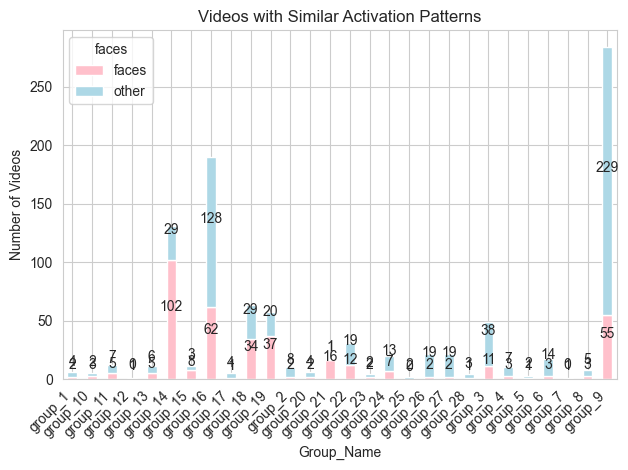

In [100]:
pivot_df = full_analysis.pivot_table(index='Group_Name', columns='faces', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 12))
ax = pivot_df.plot(kind='bar', stacked=True, color=['pink', 'lightblue'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylabel('Number of Videos')
plt.title('Videos with Similar Activation Patterns')

# Adjust annotation logic for stacked bars
for i, group in enumerate(pivot_df.index):
    cumulative_height = 0
    for face in pivot_df.columns:
        value = pivot_df.loc[group, face]
        cumulative_height += value
        ax.annotate(format(value, '.0f'),
                    (i, cumulative_height - (value / 2)),  # Adjust y position
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
plt.tight_layout()


In [95]:
# Function to find the most active ROI for each group
def find_most_active_ROI(group):
    # Calculate the mean (or sum) activation value for each ROI, excluding non-ROI columns
    roi_means = group[['EBA', 'FFA', 'LOC', 'PPA', 'STS', 'V1', 'V2', 'V3', 'V4']].mean()
    # Identify the ROI with the highest mean activation value
    most_active_roi = roi_means.idxmax()
    # Get the mean activation value of the most active ROI
    mean_activation = roi_means[most_active_roi]
    return pd.Series([most_active_roi, mean_activation], index=['Most_Active_ROI', 'Mean_Activation'])

# Group the dataframe by 'Group_Name' and apply the function
most_active_rois = full_analysis.groupby('Group_Name').apply(find_most_active_ROI)

# Reset index and rename columns
most_active_rois.reset_index(inplace=True)
most_active_rois.columns = ['Group_Name', 'Most_Active_ROI', 'Mean_Activation']

# Display the DataFrame
most_active_rois

,Group_Name,Most_Active_ROI,Mean_Activation
0,group_1,STS,-0.030695
1,group_10,V1,0.106733
2,group_11,PPA,0.039936
3,group_12,V1,0.068092
4,group_13,FFA,0.031873
5,group_14,FFA,0.207856
6,group_15,EBA,0.198247
7,group_16,EBA,0.159813
8,group_17,EBA,0.127910
9,group_18,V1,0.133183
